In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\pc\Downloads\bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
df.shape

(45211, 17)

In [11]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df['job']=df['job'].map({'management':7, 'technician':6, 'entrepreneur':4, 'blue-collar':5,
       'unknown':0, 'retired':11, 'admin.':8, 'services':9, 'self-employed':10,
       'unemployed':2, 'housemaid':3, 'student':1})
df['marital']=df['marital'].map({'married':2, 'single':1, 'divorced':0})
df['education']=df['education'].map({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})
df['default']=df['default'].map({'no':0, 'yes':1})
df['housing']=df['housing'].map({'yes':1, 'no':0})
df['loan']=df['loan'].map({'no':0, 'yes':1})
df['contact']=df['contact'].map({'unknown':0, 'cellular':1, 'telephone':2})
df['month']=df['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})
df['poutcome']=df['poutcome'].map({'unknown':0, 'failure':2, 'other':3, 'success':1})
df['y']=df['y'].map({'no':0, 'yes':1})

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,7,2,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,6,1,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,4,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,5,2,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,0,1,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


Class 0: 39922
Class 1: 5289
Proportion of class 0 is  88.3 %
Proportion of class 1 is  11.7 %


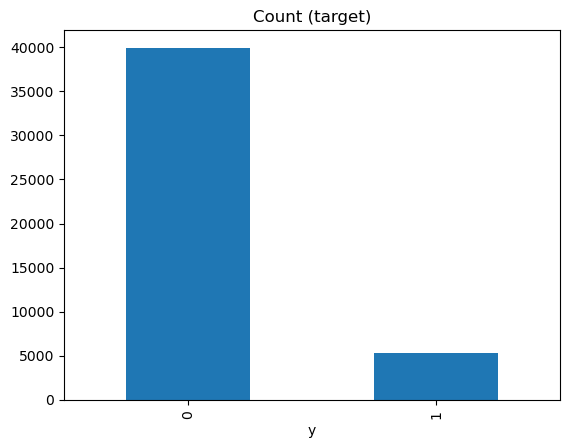

In [14]:
target_count = df ['y'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')
target_count.plot(kind='bar', title='Count (target)');

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('y',axis=1)
y = df ['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [16]:
print(y_train.shape,X_train_scaled.shape)

(31647,) (31647, 16)


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [29]:
tree_model= DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred=tree_model.predict(X_test)

In [31]:
tree_accuracy_score= accuracy_score(y_test, y_pred)
tree_accuracy_score

0.8748156885874373